# 기계마모 머신러닝 MINI PROJECT


- https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

- Source: Stephan Matzka, School of Engineering - Technology and Life, Hochschule fÃ¼r Technik und Wirtschaft Berlin, 12459 Berlin, Germany, stephan.matzka '@' htw-berlin.de

- Data Set Information : Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

In [4]:
# 버전에 따른 warning 문구 제거
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# 라이브러리 import
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np 

## 1.기계 고장유무 판단

### (1) 데이터 전처리

In [6]:
df= pd.read_csv('기계마모.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
# 필요없는 column drop
df.drop(['UDI','Product ID'], axis=1, inplace=True)

In [9]:
# 기계타입 labeling
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
df["Type"] = encoder.fit_transform(df["Type"])
df.head()

# O : Type H
# 1 : Type L
# 2 : Type M

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure


### (2) EDA

In [12]:
df.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


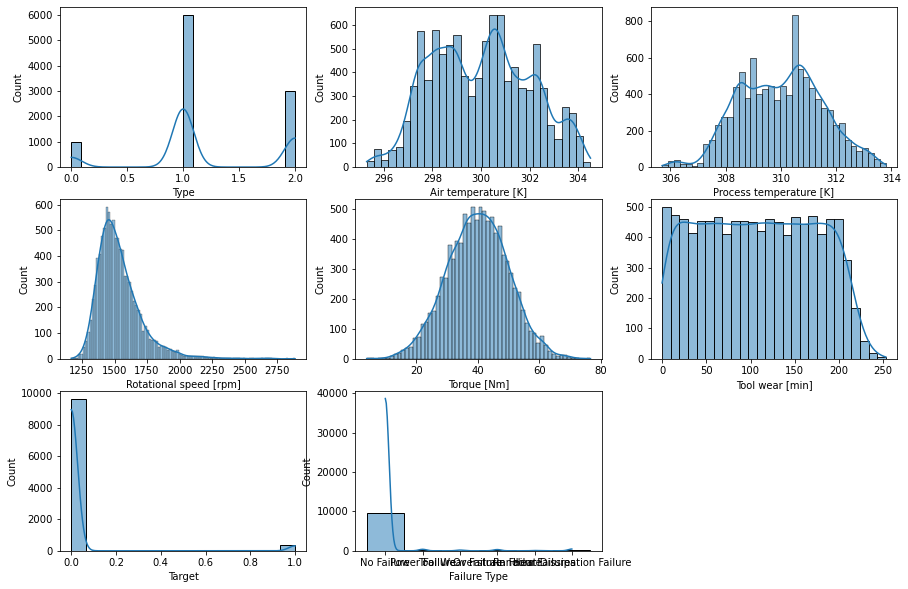

In [13]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

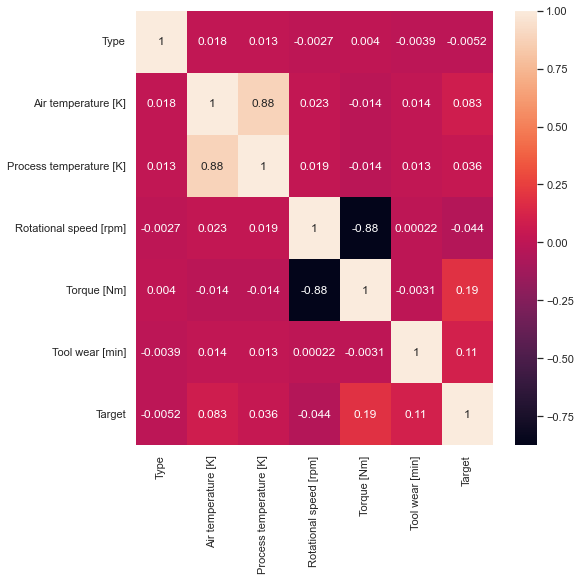

In [14]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot = True, cbar = True)
plt.show()

In [15]:
corr_order=df.corr().loc[:'Tool wear [min]','Target'].abs().sort_values(ascending=False)
corr_order

Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Rotational speed [rpm]     0.044188
Process temperature [K]    0.035946
Type                       0.005152
Name: Target, dtype: float64

In [16]:
# 상관관계 분석

# Target과의 상관도가 낮기 때문에 특정 feature가 Target에 영향을 미친다고 보기 어렵다.
# 전체 feature를 사용하여 머신러닝을 학습시켜 판단해보고자 한다.

### (3)머신러닝

### a. 학습데이터와 테스터 데이터 분할

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_data = df.loc[:,"Type":"Tool wear [min]"]
y_data = df.loc[:,"Target"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,shuffle=True, random_state=42)

In [20]:
# 학습데이터, 테스트 데이터 확인
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 6) (8000,) (2000, 6) (2000,)


### b. 모델 불러오기

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf2 = KNeighborsClassifier(n_neighbors=10)
knn_clf3 = KNeighborsClassifier(n_neighbors=30)
svm_svc = SVC()
svm_svc2 = SVC(kernel="linear")

clf_list = [rf_clf,lr_clf,knn_clf,knn_clf2,knn_clf3,svm_svc,svm_svc2]

### c. 최적의 모델 찾기(교차 검증)

In [23]:
# cross_val_score 
from sklearn.model_selection import cross_val_score

In [24]:
for i in clf_list:
    scores = cross_val_score(i, X_train , y_train , cv=5)
    for iter_count,accuracy in enumerate(scores):
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    print("평균 정확도: {0:.4f}".format(np.mean(scores)),i)

교차 검증 0 정확도: 0.9875
교차 검증 1 정확도: 0.9788
교차 검증 2 정확도: 0.9825
교차 검증 3 정확도: 0.9825
교차 검증 4 정확도: 0.9819
평균 정확도: 0.9826 RandomForestClassifier(random_state=11)
교차 검증 0 정확도: 0.9744
교차 검증 1 정확도: 0.9669
교차 검증 2 정확도: 0.9669
교차 검증 3 정확도: 0.9694
교차 검증 4 정확도: 0.9681
평균 정확도: 0.9691 LogisticRegression()
교차 검증 0 정확도: 0.9731
교차 검증 1 정확도: 0.9644
교차 검증 2 정확도: 0.9712
교차 검증 3 정확도: 0.9694
교차 검증 4 정확도: 0.9694
평균 정확도: 0.9695 KNeighborsClassifier()
교차 검증 0 정확도: 0.9694
교차 검증 1 정확도: 0.9669
교차 검증 2 정확도: 0.9694
교차 검증 3 정확도: 0.9675
교차 검증 4 정확도: 0.9694
평균 정확도: 0.9685 KNeighborsClassifier(n_neighbors=10)
교차 검증 0 정확도: 0.9681
교차 검증 1 정확도: 0.9663
교차 검증 2 정확도: 0.9694
교차 검증 3 정확도: 0.9663
교차 검증 4 정확도: 0.9663
평균 정확도: 0.9672 KNeighborsClassifier(n_neighbors=30)
교차 검증 0 정확도: 0.9656
교차 검증 1 정확도: 0.9663
교차 검증 2 정확도: 0.9650
교차 검증 3 정확도: 0.9650
교차 검증 4 정확도: 0.9650
평균 정확도: 0.9654 SVC()
교차 검증 0 정확도: 0.9731
교차 검증 1 정확도: 0.9688
교차 검증 2 정확도: 0.9669
교차 검증 3 정확도: 0.9688
교차 검증 4 정확도: 0.9663
평균 정확도: 0.9688 SVC(kernel='linear')


In [25]:
# 평균 정확도가 0.9826인 RandomForest의 하이퍼파라미터 선정을 위한 그리드서치

### d.최적의 파라미터 찾기

In [26]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

In [27]:
parameters = {"max_depth":[2,3,5,10],
              "min_samples_split": [2,3,5],
              "min_samples_leaf": [1,5,8]
             }

In [28]:
grid_rt_clf = GridSearchCV(rf_clf, param_grid=parameters, scoring="accuracy", cv=5)

In [29]:
grid_rt_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [30]:
# 최고 정확도 
grid_rt_clf.best_score_

0.9825000000000002

In [31]:
# 최적의 하이퍼 파라미터
grid_rt_clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [32]:
best_rt_clf = grid_rt_clf.best_estimator_

### e.학습된 모델로 예측하기 

In [33]:
pred = best_rt_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9815

### f. 모델 성능 평가 

In [34]:
from sklearn.metrics import classification_report

target_names = ['정상','고장']
print(classification_report(y_test, pred ,target_names=target_names))

              precision    recall  f1-score   support

          정상       0.99      1.00      0.99      1939
          고장       0.80      0.52      0.63        61

    accuracy                           0.98      2000
   macro avg       0.89      0.76      0.81      2000
weighted avg       0.98      0.98      0.98      2000



### g. 문제분석


0(비고장)은 잘 찾지만, 1(고장)은 잘 찾지 못한다.(확인결과 : 데이터 편중)

원인 분석 : target 데이터의 비대칭성(비고장 : 9661개, 고장 : 339개)

-> 데이터를 임의 조절 (각 타입의 비율 유지한 채로 비고장:고장=4:1 인 dataset 만들어서 머신러닝)

## 2. 임의 조절한 데이터를 활용한 기계 고장 유무 판단


- 각 타입의 비율 유지한 비고장:고장=4:1 인 dataset 활용

### (1) 데이터 전처리

In [35]:
m_df = pd.read_csv("NEW기계.csv")
m_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,L,298.1,308.2,1482,37.9,17,0,No Failure
1,L,299.5,308.7,2549,13.0,179,1,Power Failure
2,L,297.4,308.5,2100,16.9,176,0,No Failure
3,M,298.9,309.0,1812,25.9,174,0,No Failure
4,L,296.2,307.0,1414,48.3,162,0,No Failure


In [36]:
# 기계 타입 라벨링

In [37]:
encoder = LabelEncoder()

In [38]:
m_df["Type"] = encoder.fit_transform(m_df["Type"])
m_df

# O : Type H
# 1 : Type L
# 2 : Type M

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.2,1482,37.9,17,0,No Failure
1,1,299.5,308.7,2549,13.0,179,1,Power Failure
2,1,297.4,308.5,2100,16.9,176,0,No Failure
3,2,298.9,309.0,1812,25.9,174,0,No Failure
4,1,296.2,307.0,1414,48.3,162,0,No Failure
...,...,...,...,...,...,...,...,...
1720,1,298.0,308.2,1348,58.8,202,1,Overstrain Failure
1721,1,298.0,308.7,1771,26.2,206,0,No Failure
1722,1,298.8,309.1,1477,42.4,158,0,No Failure
1723,1,298.7,309.8,1322,57.0,140,0,No Failure


### (2) EDA

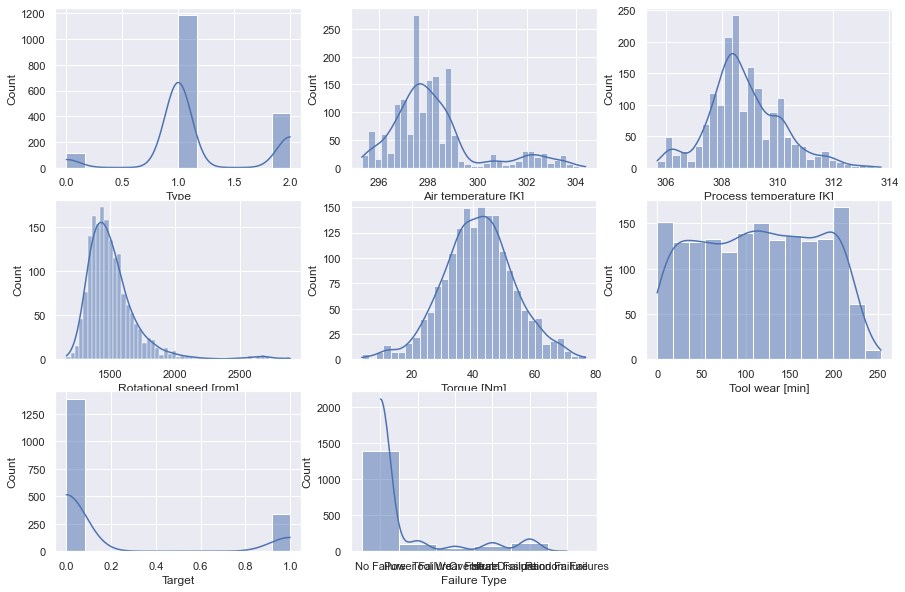

In [39]:
plt.figure(figsize=(15,10))
for i,col in enumerate(m_df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(m_df[col],kde=True)

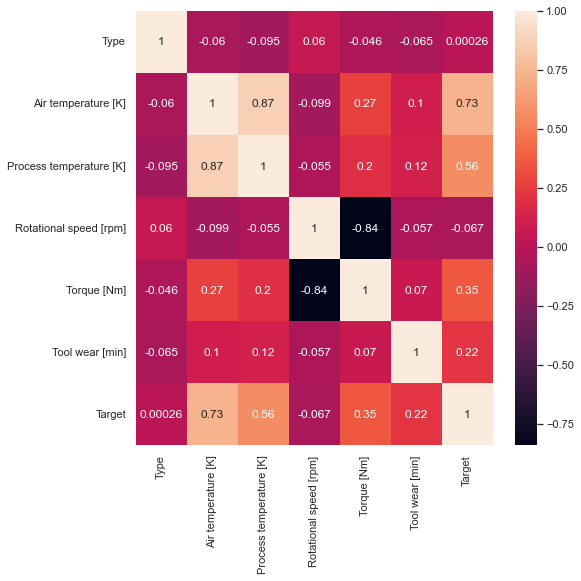

In [40]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(m_df.corr(), annot = True, cbar = True)
plt.show()

In [41]:
corr_order1=m_df.corr().loc[:'Tool wear [min]','Target'].abs().sort_values(ascending=False)
corr_order1

Air temperature [K]        0.730735
Process temperature [K]    0.563967
Torque [Nm]                0.354796
Tool wear [min]            0.215863
Rotational speed [rpm]     0.067155
Type                       0.000264
Name: Target, dtype: float64

In [42]:
# 기존의 데이터의 타겟과의 상관관계에 비해 높아진 것을 확인할 수 있다. 
# air temp, process temp, Torque가 target과 강한 양의 상관관계를 가진다
# Tool wear가 target과 약한 양의 상관관계를 가진다

# -> 상관관계가 작은 rpm, Type 을 제외한 feature를 활용하여 머신러닝

### (3) 머신러닝

### a.학습데이터와 테스터 데이터 분할

In [43]:
X_data2 = m_df.loc[:,["Air temperature [K]","Process temperature [K]","Torque [Nm]","Tool wear [min]"]]
y_data2 = m_df.loc[:,"Target"]

In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.2,shuffle=True, random_state=42)

### b. 모델 불러오기

In [45]:
# 모델 불러오기 (1과 동일)
# rf_clf = RandomForestClassifier(random_state=11)
# lr_clf = LogisticRegression()
# knn_clf = KNeighborsClassifier(n_neighbors=5)
# knn_clf2 = KNeighborsClassifier(n_neighbors=10)
# knn_clf3 = KNeighborsClassifier(n_neighbors=30)
# svm_svc = SVC()
# svm_svc2 = SVC(kernel="linear")

# clf_list = [rf_clf,lr_clf,knn_clf,knn_clf2,knn_clf3,svm_svc,svm_svc2]

### c. 최적의 모델 찾기(교차 검증)

In [46]:
# cross_val_score

for i in clf_list:
    scores = cross_val_score(i, X_train2 , y_train2.values.ravel() , cv=5)
    for iter_count,accuracy in enumerate(scores):
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    print("평균 정확도: {0:.4f}".format(np.mean(scores)),i)

교차 검증 0 정확도: 0.9783
교차 검증 1 정확도: 0.9674
교차 검증 2 정확도: 0.9674
교차 검증 3 정확도: 0.9891
교차 검증 4 정확도: 0.9746
평균 정확도: 0.9754 RandomForestClassifier(random_state=11)
교차 검증 0 정확도: 0.9022
교차 검증 1 정확도: 0.9203
교차 검증 2 정확도: 0.9203
교차 검증 3 정확도: 0.9058
교차 검증 4 정확도: 0.9348
평균 정확도: 0.9167 LogisticRegression()
교차 검증 0 정확도: 0.8986
교차 검증 1 정확도: 0.9022
교차 검증 2 정확도: 0.9312
교차 검증 3 정확도: 0.9167
교차 검증 4 정확도: 0.9312
평균 정확도: 0.9159 KNeighborsClassifier()
교차 검증 0 정확도: 0.8804
교차 검증 1 정확도: 0.8768
교차 검증 2 정확도: 0.9094
교차 검증 3 정확도: 0.8841
교차 검증 4 정확도: 0.8913
평균 정확도: 0.8884 KNeighborsClassifier(n_neighbors=10)
교차 검증 0 정확도: 0.8732
교차 검증 1 정확도: 0.8551
교차 검증 2 정확도: 0.8696
교차 검증 3 정확도: 0.8514
교차 검증 4 정확도: 0.8696
평균 정확도: 0.8638 KNeighborsClassifier(n_neighbors=30)
교차 검증 0 정확도: 0.8043
교차 검증 1 정확도: 0.8043
교차 검증 2 정확도: 0.8043
교차 검증 3 정확도: 0.8043
교차 검증 4 정확도: 0.8007
평균 정확도: 0.8036 SVC()
교차 검증 0 정확도: 0.9239
교차 검증 1 정확도: 0.9674
교차 검증 2 정확도: 0.9312
교차 검증 3 정확도: 0.9565
교차 검증 4 정확도: 0.9348
평균 정확도: 0.9428 SVC(kernel='linear')


In [47]:
# 평균 정확도가 0.9754인 RandomForest의 하이퍼파라미터 선정을 위한 그리드서치

### d. 최적의 파라미터 찾기

In [48]:
# GridSearchCV

parameters = {"max_depth":[2,3,5,10],
              "min_samples_split": [2,3,5],
              "min_samples_leaf": [1,5,8]
             }

grid_rt_clf2 = GridSearchCV(rf_clf, param_grid=parameters, scoring="accuracy", cv=5)
grid_rt_clf2.fit(X_train2,y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [49]:
# 최고 정확도 
grid_rt_clf2.best_score_

0.976086956521739

In [50]:
# 최적의 파라미터
grid_rt_clf2.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [51]:
best_rt_clf2 = grid_rt_clf2.best_estimator_

### e.학습된 모델로 예측하기

In [52]:
pred2 = best_rt_clf2.predict(X_test2)
accuracy_score(y_test2, pred2)

0.9855072463768116

### f. 모델 성능 평가

In [53]:
print(classification_report(y_test2,pred2,target_names = ['정상','고장']))

              precision    recall  f1-score   support

          정상       0.99      1.00      0.99       277
          고장       0.98      0.94      0.96        68

    accuracy                           0.99       345
   macro avg       0.99      0.97      0.98       345
weighted avg       0.99      0.99      0.99       345



### g. 모든 feature를 사용한 머신러닝과 비교

In [54]:
X_data3 = m_df.loc[:,"Air temperature [K]":"Tool wear [min]"]
y_data3 = m_df.loc[:,"Target"]

In [55]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_data3, test_size=0.2,shuffle=True, random_state=42)

In [56]:
# cross_val_score

for i in clf_list:
    scores = cross_val_score(i, X_train3 , y_train3.values.ravel() , cv=5)
    for iter_count,accuracy in enumerate(scores):
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    print("평균 정확도: {0:.4f}".format(np.mean(scores)),i)

교차 검증 0 정확도: 0.9819
교차 검증 1 정확도: 0.9783
교차 검증 2 정확도: 0.9746
교차 검증 3 정확도: 0.9891
교차 검증 4 정확도: 0.9746
평균 정확도: 0.9797 RandomForestClassifier(random_state=11)
교차 검증 0 정확도: 0.9529
교차 검증 1 정확도: 0.9348
교차 검증 2 정확도: 0.9384
교차 검증 3 정확도: 0.9167
교차 검증 4 정확도: 0.9420
평균 정확도: 0.9370 LogisticRegression()
교차 검증 0 정확도: 0.8949
교차 검증 1 정확도: 0.8768
교차 검증 2 정확도: 0.8841
교차 검증 3 정확도: 0.8551
교차 검증 4 정확도: 0.8804
평균 정확도: 0.8783 KNeighborsClassifier()
교차 검증 0 정확도: 0.9022
교차 검증 1 정확도: 0.8768
교차 검증 2 정확도: 0.8551
교차 검증 3 정확도: 0.8877
교차 검증 4 정확도: 0.8551
평균 정확도: 0.8754 KNeighborsClassifier(n_neighbors=10)
교차 검증 0 정확도: 0.8986
교차 검증 1 정확도: 0.8659
교차 검증 2 정확도: 0.8659
교차 검증 3 정확도: 0.8623
교차 검증 4 정확도: 0.8406
평균 정확도: 0.8667 KNeighborsClassifier(n_neighbors=30)
교차 검증 0 정확도: 0.8406
교차 검증 1 정확도: 0.8188
교차 검증 2 정확도: 0.8116
교차 검증 3 정확도: 0.8188
교차 검증 4 정확도: 0.8152
평균 정확도: 0.8210 SVC()
교차 검증 0 정확도: 0.9601
교차 검증 1 정확도: 0.9601
교차 검증 2 정확도: 0.9746
교차 검증 3 정확도: 0.9601
교차 검증 4 정확도: 0.9638
평균 정확도: 0.9638 SVC(kernel='linear')


In [57]:
# 평균 정확도가 0.9797인 RandomForest의 하이퍼파라미터 선정을 위한 그리드서치

In [58]:
# GridSearchCV

parameters = {"max_depth":[2,3,5,10],
              "min_samples_split": [2,3,5],
              "min_samples_leaf": [1,5,8]
             }

grid_rt_clf3 = GridSearchCV(rf_clf, param_grid=parameters, scoring="accuracy", cv=5)
grid_rt_clf3.fit(X_train3,y_train3)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [59]:
# 최고 정확도 
grid_rt_clf3.best_score_

0.9804347826086955

In [60]:
# 최적의 파라미터
grid_rt_clf3.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [61]:
best_rt_clf3 = grid_rt_clf3.best_estimator_

In [62]:
# 학습된 모델로 예측하기
pred3 = best_rt_clf3.predict(X_test3)
accuracy_score(y_test3, pred3)

0.9855072463768116

In [63]:
# 모델 성능평가 
print("\ntype, rpm 제외한 feature\n--------------------------------------------------------------" )
print(classification_report(y_test2,pred2,target_names = ['정상','고장']))
print('--------------------------------------------------------------')
print("\n전체 feature\n--------------------------------------------------------------" )
print(classification_report(y_test3,pred3,target_names = ['정상','고장']))


type, rpm 제외한 feature
--------------------------------------------------------------
              precision    recall  f1-score   support

          정상       0.99      1.00      0.99       277
          고장       0.98      0.94      0.96        68

    accuracy                           0.99       345
   macro avg       0.99      0.97      0.98       345
weighted avg       0.99      0.99      0.99       345

--------------------------------------------------------------

전체 feature
--------------------------------------------------------------
              precision    recall  f1-score   support

          정상       0.99      0.99      0.99       277
          고장       0.97      0.96      0.96        68

    accuracy                           0.99       345
   macro avg       0.98      0.97      0.98       345
weighted avg       0.99      0.99      0.99       345



### h. discussion 

rpm, type을 제외한 feature를 사용한 머신러닝을 A model 전체 feature 를 사용한 머신러닝을 B model이라고 하자

A model과 B model의 accuracy는 동일하였지만, 고장의 precision과 reacll에서 차이남을 보였다. 

실제 기계를 사용함에 있어서 실제 고장인 기계를 정상이라고 예측한 경우를 줄여한다. 

이는 고장의 recall값과 관계되어 있으며 높을 수록 실제 고장인 기계를 고장이라고 예측할 확률이 높다.

이에 전체 feature를 사용한 B model이 A model보다 고장의 recall 값이 높게 나왔지만, 

확률로 보았을 때 두 모델의 값의 차이가 크지 않으므로 자원의 한계가 있을 때는 A model이 적합하다고 판단된다. 



### 3. 고장유형판단

- 임의조절한 데이터셋 사용

### (1) 고장유형판단 머신러닝

In [64]:
# 고장유형라벨링
m_df["Failure Type"] = encoder.fit_transform(m_df["Failure Type"])

In [65]:
# test, train 분할
X_data4 = m_df.loc[:,"Type":"Tool wear [min]"]
y_data4 = m_df.loc[:,"Failure Type"]

In [66]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_data4, y_data4, test_size=0.2,shuffle=True, random_state=42)

In [67]:
# 최적의 모델 찾기 
for i in clf_list:
    scores = cross_val_score(i, X_train4 , y_train4.values.ravel() , cv=5)
    for iter_count,accuracy in enumerate(scores):
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    print("평균 정확도: {0:.4f}".format(np.mean(scores)),i)

교차 검증 0 정확도: 0.9710
교차 검증 1 정확도: 0.9493
교차 검증 2 정확도: 0.9601
교차 검증 3 정확도: 0.9638
교차 검증 4 정확도: 0.9565
평균 정확도: 0.9601 RandomForestClassifier(random_state=11)
교차 검증 0 정확도: 0.8877
교차 검증 1 정확도: 0.8261
교차 검증 2 정확도: 0.8370
교차 검증 3 정확도: 0.8877
교차 검증 4 정확도: 0.8406
평균 정확도: 0.8558 LogisticRegression()
교차 검증 0 정확도: 0.8768
교차 검증 1 정확도: 0.8587
교차 검증 2 정확도: 0.8261
교차 검증 3 정확도: 0.8406
교차 검증 4 정확도: 0.8370
평균 정확도: 0.8478 KNeighborsClassifier()
교차 검증 0 정확도: 0.8841
교차 검증 1 정확도: 0.8696
교차 검증 2 정확도: 0.8297
교차 검증 3 정확도: 0.8659
교차 검증 4 정확도: 0.8370
평균 정확도: 0.8572 KNeighborsClassifier(n_neighbors=10)
교차 검증 0 정확도: 0.8804
교차 검증 1 정확도: 0.8551
교차 검증 2 정확도: 0.8406
교차 검증 3 정확도: 0.8478
교차 검증 4 정확도: 0.8188
평균 정확도: 0.8486 KNeighborsClassifier(n_neighbors=30)
교차 검증 0 정확도: 0.8478
교차 검증 1 정확도: 0.8261
교차 검증 2 정확도: 0.8116
교차 검증 3 정확도: 0.8225
교차 검증 4 정확도: 0.8188
평균 정확도: 0.8254 SVC()
교차 검증 0 정확도: 0.9783
교차 검증 1 정확도: 0.9601
교차 검증 2 정확도: 0.9819
교차 검증 3 정확도: 0.9710
교차 검증 4 정확도: 0.9746
평균 정확도: 0.9732 SVC(kernel='linear')


In [68]:
# 평균 정확도가 0.9732인 SVC(kernel='linear')의 하이퍼파라미터 선정을 위한 그리드서치

svm_parameters = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
grid_svm_clf = GridSearchCV(svm_svc2, param_grid=svm_parameters, scoring="accuracy", cv=5)

In [69]:
grid_svm_clf.fit(X_train4,y_train4)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [70]:
grid_svm_clf.best_score_

0.9731884057971014

In [71]:
grid_svm_clf.best_params_

{'C': 1}

In [72]:
best_svm_clf = grid_svm_clf.best_estimator_

In [73]:
#학습된 모델로 예측하기
svm_pred = best_svm_clf.predict(X_test4)

In [74]:
accuracy_score(y_test4, svm_pred)

0.9855072463768116

In [75]:
# 모델 검증
print(classification_report(y_test4,svm_pred, target_names=['Heat Dissipation Failure','No Failure','Overstrain Failure','Power Failure','Tool Wear Failure']))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.96      1.00      0.98        22
              No Failure       0.99      1.00      0.99       278
      Overstrain Failure       1.00      1.00      1.00        12
           Power Failure       1.00      0.90      0.95        21
       Tool Wear Failure       1.00      0.75      0.86        12

                accuracy                           0.99       345
               macro avg       0.99      0.93      0.96       345
            weighted avg       0.99      0.99      0.98       345



### (2) 고장 유형 분석

In [76]:
df_target0 = m_df.copy()
df_target1 = m_df.copy()
# 정상값들만 추출 
df_target0 = df_target0[df_target0["Target"]==0]
# 고장인 값들만 추출 
df_target1 = df_target1[df_target1["Target"]==1]

In [77]:
# 고장인 기계 중 고장 유형이 'Heat Dissipation Failure'인 값들 추출 
df_hdf = df_target1[df_target1["Failure Type"]==0]

In [78]:
# 정상값과 'Heat Dissipation Failure'인 고장 기계 분석 
display(df_target0.describe())
df_hdf.describe()

# 예측
# Heat Dissipation Failure은 방열 고장이니 온도 요소들에 영향을 받을 것이다

# 분석
# Heat Dissipation Failure를 air temp 정상값(평균 =297K)과 비교했을 때 air temp(평균=302K)이 높다 
# Heat Dissipation Failure를 process temp 정상값(평균 = 308K)과 비교했을 때 process temp(평균=310K)가 높다
# 고장 평균 air temp(평균 = 300K) 보다 'Heat Dissipation Failure' 의 air temp(평균=302K)이 더 높다 

# 또한 Heat Dissipation Failure의 rotational speed값(평균 = 1337rpm)이 정상의 rotational speed(평균=1534rpm) 값보다 낮다. 
# 이는 기계의 회전속도가 낮아지면 열 분산에 영향을 미치기 때문으로 판단된다. 

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.0,1386.000000
mean,1.182540,297.576696,308.448846,1534.200577,39.772727,107.599567,0.0,1.002165
std,0.529844,0.912685,0.987899,159.947438,9.063310,63.054402,0.0,0.080582
min,0.000000,295.300000,305.700000,1168.000000,13.800000,0.000000,0.0,1.000000
25%,1.000000,296.900000,307.900000,1428.000000,33.700000,53.000000,0.0,1.000000
50%,1.000000,297.600000,308.400000,1501.000000,40.100000,109.000000,0.0,1.000000
75%,1.000000,298.300000,309.100000,1605.000000,46.200000,160.000000,0.0,1.000000
max,2.000000,299.100000,310.400000,2449.000000,63.400000,240.000000,0.0,4.000000


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.0,112.0
mean,1.196429,302.567857,310.799107,1337.964286,52.778571,107.339286,1.0,0.0
std,0.550827,0.604371,0.644938,34.371036,5.825285,64.427283,0.0,0.0
min,0.000000,300.800000,309.400000,1212.000000,41.600000,2.000000,1.0,0.0
25%,1.000000,302.100000,310.300000,1323.250000,48.200000,54.500000,1.0,0.0
50%,1.000000,302.450000,310.700000,1346.000000,52.350000,106.000000,1.0,0.0
75%,2.000000,303.125000,311.300000,1363.250000,56.350000,161.500000,1.0,0.0
max,2.000000,303.700000,312.200000,1379.000000,67.800000,229.000000,1.0,0.0


In [79]:
# 고장인 기계 중 고장 유형이 'Overstrain Failure'인 값들 추출 
df_of = df_target1[df_target1["Failure Type"]==2]

In [80]:
# 정상값과 'Overstrain Failure'인 고장 기계 분석 
display(df_target0.describe())
df_of.describe()


# 예측
# Overstrain Failure은 과변형 고장이니 토크와 공구마모에 영향을 받을 것이다.  

# 분석
# Overstrain Failure를 Torque의 정상값(평균=39Nm)과 비교했을 때 상대적으로 Torque(평균=56Nm)가 높다
# Overstrain Failure를 Tool wear의 정상값(평균=107min)과 비교했을 때 Tool wear(평균=208min)가 높다
# Torque와 Rotational speed는 위의 히트맵에서 강한 음의 상관관계를 가지므로 정상값(평균=1534rpm)과 비교했을 때 낮은 것(평균=1354rpm)을 확인할 수 있다. 

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.0,1386.000000
mean,1.182540,297.576696,308.448846,1534.200577,39.772727,107.599567,0.0,1.002165
std,0.529844,0.912685,0.987899,159.947438,9.063310,63.054402,0.0,0.080582
min,0.000000,295.300000,305.700000,1168.000000,13.800000,0.000000,0.0,1.000000
25%,1.000000,296.900000,307.900000,1428.000000,33.700000,53.000000,0.0,1.000000
50%,1.000000,297.600000,308.400000,1501.000000,40.100000,109.000000,0.0,1.000000
75%,1.000000,298.300000,309.100000,1605.000000,46.200000,160.000000,0.0,1.000000
max,2.000000,299.100000,310.400000,2449.000000,63.400000,240.000000,0.0,4.000000


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0
mean,1.038462,299.867949,310.051282,1354.243590,56.878205,208.217949,1.0,2.0
std,0.251866,1.954050,1.552940,59.628544,4.904216,14.448878,0.0,0.0
min,0.000000,295.600000,306.100000,1181.000000,46.300000,177.000000,1.0,2.0
25%,1.000000,298.325000,308.600000,1327.500000,53.150000,200.000000,1.0,2.0
50%,1.000000,299.450000,310.100000,1362.500000,56.750000,207.000000,1.0,2.0
75%,1.000000,301.150000,311.100000,1382.250000,60.600000,216.000000,1.0,2.0
max,2.000000,304.000000,313.100000,1515.000000,68.200000,251.000000,1.0,2.0


In [81]:
# 고장인 기계 중 고장 유형이 'Power Failure(전력고장)'인 값들 추출 
df_pf = df_target1[df_target1["Failure Type"]==3]

In [82]:
# 정상값과 'Power Failure'인 고장 기계 분석 
display(df_target0.describe())
df_pf.describe()

# 전력고장은 전력이 3500W 미만 또는 9000W 이상일 때 발생한다.

# 예측
# 기계의 전력소모량은 토크와 회전속도의 곱이므로, Power Failure(전력고장)와 관련되어 있을 것이다.

# 분석
# Power Failure를 정상값의 rotational speed(평균 = 1386rpm)와 비교했을 때 상대적으로 높다(평균=1763rpm)
# Power Failure를 정상값의 Torque(평균 = 39Nm)와 비교했을 때 상대적으로 높다(평균=48Nm)
# 3500W미만으로 인한 Power Failure보다 9000W 이상으로 인한 Power Failure가 많이 발생한 것으로 예측된다. 

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.0,1386.000000
mean,1.182540,297.576696,308.448846,1534.200577,39.772727,107.599567,0.0,1.002165
std,0.529844,0.912685,0.987899,159.947438,9.063310,63.054402,0.0,0.080582
min,0.000000,295.300000,305.700000,1168.000000,13.800000,0.000000,0.0,1.000000
25%,1.000000,296.900000,307.900000,1428.000000,33.700000,53.000000,0.0,1.000000
50%,1.000000,297.600000,308.400000,1501.000000,40.100000,109.000000,0.0,1.000000
75%,1.000000,298.300000,309.100000,1605.000000,46.200000,160.000000,0.0,1.000000
max,2.000000,299.100000,310.400000,2449.000000,63.400000,240.000000,0.0,4.000000


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.0
mean,1.273684,300.075789,309.954737,1763.968421,48.514737,101.884211,1.0,3.0
std,0.554327,2.147127,1.600450,620.829138,26.788653,64.355704,0.0,0.0
min,0.000000,295.700000,306.200000,1200.000000,3.800000,0.000000,1.0,3.0
25%,1.000000,298.400000,308.700000,1312.500000,12.800000,50.500000,1.0,3.0
50%,1.000000,300.400000,310.200000,1386.000000,63.600000,100.000000,1.0,3.0
75%,2.000000,301.800000,311.000000,2563.500000,68.400000,150.000000,1.0,3.0
max,2.000000,304.000000,313.200000,2886.000000,76.600000,234.000000,1.0,3.0


In [83]:
# 고장인 기계 중 고장 유형이 'Tool Wear Failure'인 값들 추출 

df_tw = df_target1[df_target1["Failure Type"]==5]

In [84]:
# 정상값과 'Tool Wear Failure'인 고장 기계 분석
display(df_target0.describe())
df_tw.describe()

#예측
# Tool Wear Failure는 Tool wear 시간과 관련되어 있을 것이다. 

# 분석
# Tool Wear Failure을 정상값의 Tool wear(평균 =107min) 비교했을 때 Tool wear(평균=216min)가 높다.

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.0,1386.000000
mean,1.182540,297.576696,308.448846,1534.200577,39.772727,107.599567,0.0,1.002165
std,0.529844,0.912685,0.987899,159.947438,9.063310,63.054402,0.0,0.080582
min,0.000000,295.300000,305.700000,1168.000000,13.800000,0.000000,0.0,1.000000
25%,1.000000,296.900000,307.900000,1428.000000,33.700000,53.000000,0.0,1.000000
50%,1.000000,297.600000,308.400000,1501.000000,40.100000,109.000000,0.0,1.000000
75%,1.000000,298.300000,309.100000,1605.000000,46.200000,160.000000,0.0,1.000000
max,2.000000,299.100000,310.400000,2449.000000,63.400000,240.000000,0.0,4.000000


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.0
mean,1.177778,300.288889,310.164444,1570.666667,37.226667,216.555556,1.0,5.0
std,0.649786,1.967026,1.500781,205.799329,9.513134,12.329852,0.0,0.0
min,0.000000,296.900000,307.400000,1323.000000,16.200000,198.000000,1.0,5.0
25%,1.000000,298.600000,308.900000,1429.000000,30.500000,207.000000,1.0,5.0
50%,1.000000,300.400000,310.300000,1521.000000,37.700000,215.000000,1.0,5.0
75%,2.000000,301.800000,311.300000,1629.000000,44.400000,225.000000,1.0,5.0
max,2.000000,304.400000,313.700000,2271.000000,62.400000,253.000000,1.0,5.0


### (3) 최종결론 



In [85]:
display(df_target0.describe())
df_target1.describe()

# 고장인 경우 정상값과 비교했을 때 
# -> 비교적 air temp, process temp가 높음을 확인할 수 있다. 
# -> 비교적 Torque가 높음을 확인할 수 있다. (torque와 강한 음의 상관관계인 rpm이 낮음을 확인 가능)
# -> 비교적 Tool wear(시간)이 높음을 확인할 수 있다. 
# -> 고장유형별로 영향을 미치는 feature들을 확인할 수 있었다. 

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.0,1386.000000
mean,1.182540,297.576696,308.448846,1534.200577,39.772727,107.599567,0.0,1.002165
std,0.529844,0.912685,0.987899,159.947438,9.063310,63.054402,0.0,0.080582
min,0.000000,295.300000,305.700000,1168.000000,13.800000,0.000000,0.0,1.000000
25%,1.000000,296.900000,307.900000,1428.000000,33.700000,53.000000,0.0,1.000000
50%,1.000000,297.600000,308.400000,1501.000000,40.100000,109.000000,0.0,1.000000
75%,1.000000,298.300000,309.100000,1605.000000,46.200000,160.000000,0.0,1.000000
max,2.000000,299.100000,310.400000,2449.000000,63.400000,240.000000,0.0,4.000000


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.0,339.000000
mean,1.182891,300.886431,310.290265,1496.486726,50.168142,143.781711,1.0,1.991150
std,0.523588,2.071473,1.363686,384.943547,16.374498,72.759876,0.0,1.682641
min,0.000000,295.600000,306.100000,1181.000000,3.800000,0.000000,1.0,0.000000
25%,1.000000,299.100000,309.500000,1326.500000,45.950000,84.500000,1.0,0.000000
50%,1.000000,301.600000,310.400000,1365.000000,53.700000,165.000000,1.0,2.000000
75%,1.000000,302.500000,311.200000,1421.500000,61.200000,207.500000,1.0,3.000000
max,2.000000,304.400000,313.700000,2886.000000,76.600000,253.000000,1.0,5.000000


더해야할 것 

feature에 대한 설명 써주기

L M H에 대한 설명 
제품의 퀄리티니까 퀄리티별로 고장 유무 데이터 체크?

스캘터 함수, 상관계수 시각화 하기 
토크와 rpm의 강한 음의 상관관계 언급해주기

다중공유성?, 각각의 컬럼은 독립적이여야함

함수 교차검증한 걸 시각화 하기

tool wear 좀 낮게 나온 이유 체크?

전체 데이터셋에서 다시 테스트셋 만들어서 해보기?

rpm만 빼고 머신러닝 해보기 -> (rpm과 torque)의 상관관계 

값들 반올림 시키기 